In [1]:
## Importing the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

## Suppressing the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing dataset.
df = pd.read_csv('day.csv')

### Examining structure of the dataset


In [3]:
## Examining Dataset.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
## Examining Dataset.
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
## Examining shape of dataset.
df.shape

(730, 16)

In [6]:
## Examining info of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
## Examining descriptive statistics of dataset.

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#### Dropping unnecessary columns:
# -"instant" serves as an index for rows.
# -"dteday" contains dates, which can be represented by separate "year" and "month" columns.
# -"casual" and "registered" appear to represent breakdowns of the "cnt" column by category.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
## Encoding the required columns.

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'clear_sky',2:'misty',3:'light_precipitation',4:'heavy_precipitation'})


## Visualising the Data

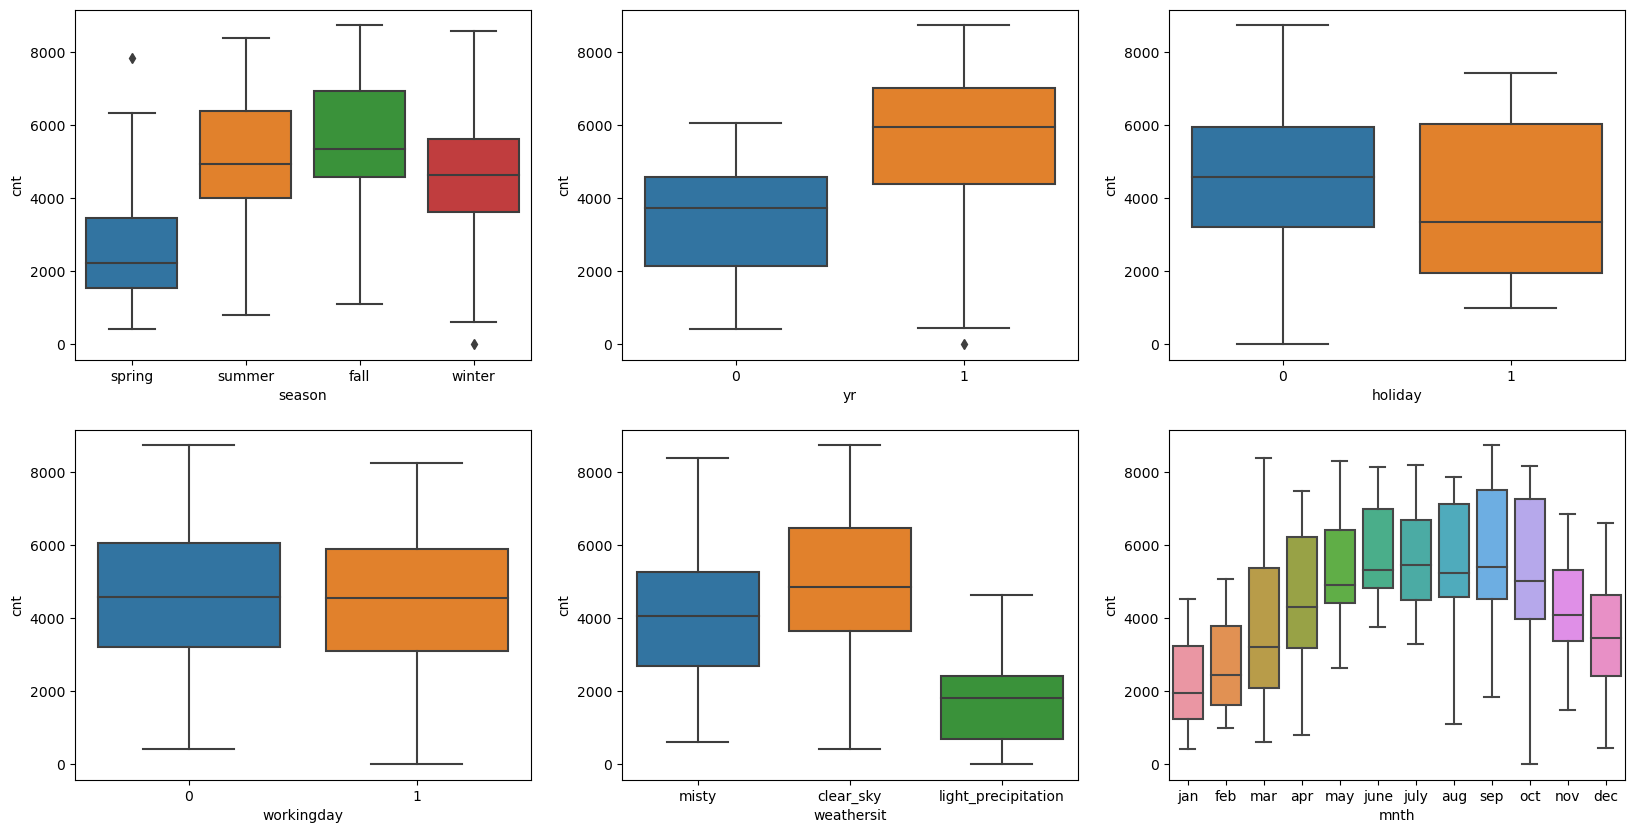

In [10]:
# Analyzing and visualizing the categorical columns to assess their relationship with the target variable.

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()


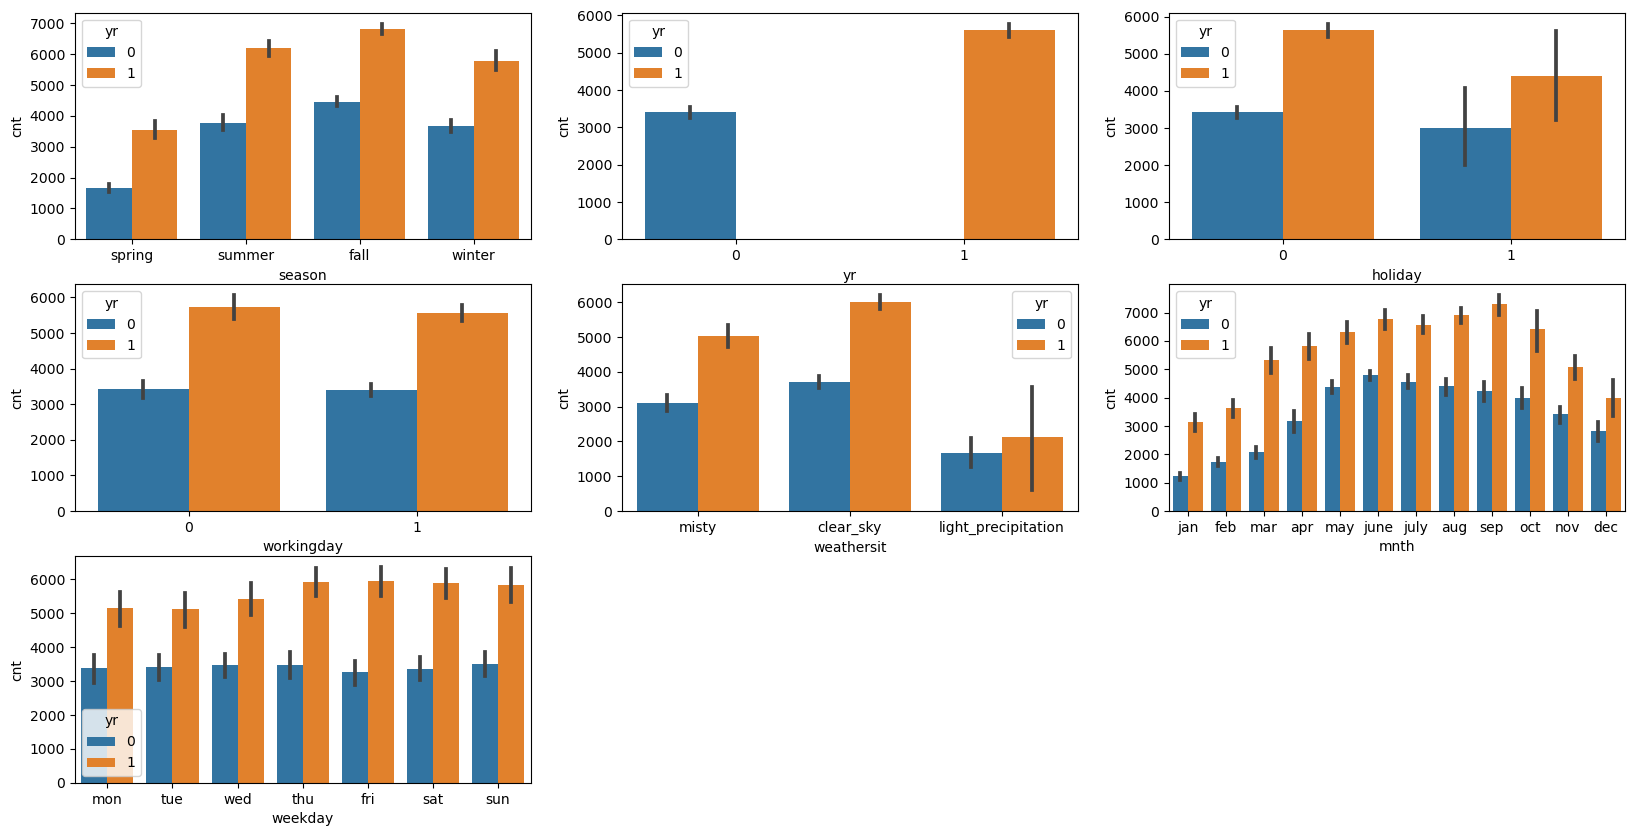

In [11]:
## Creating bar plots for categorical columns to gain further insights.

plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.barplot(x='season', y='cnt',hue='yr', data=df)
plt.subplot(3,3,2)
sns.barplot(x='yr', y='cnt', hue='yr', data=df)
plt.subplot(3,3,3)
sns.barplot(x='holiday', y='cnt',hue='yr', data=df)
plt.subplot(3,3,4)
sns.barplot(x='workingday', y='cnt',hue='yr', data=df)
plt.subplot(3,3,5)
sns.barplot(x='weathersit', y='cnt',hue='yr', data=df)
plt.subplot(3,3,6)
sns.barplot(x='mnth', y='cnt',hue='yr', data=df)
plt.subplot(3,3,7)
sns.barplot(x='weekday', y='cnt',hue='yr', data=df)
plt.show()


- Fall season saw a higher influx of bookings, and there was a significant increase in booking count across all seasons from 2018 to 2019.
- Most bookings occurred during the months of May, June, July, August, September, and October, with a trend of increasing bookings from the beginning to the middle of the year, followed by a decrease towards the end of the year. The number of bookings for each month increased from 2018 to 2019.
- Clear weather conditions attracted more bookings, which is expected. Additionally, bookings increased for each weather situation in 2019 compared to 2018.
- Thursday, Friday, Saturday, and Sunday had higher numbers of bookings compared to the beginning of the week.
- Booking numbers were lower on non-holidays, which is understandable as people may prefer to stay home and spend time with family on holidays. 
- There was almost an equal number of bookings on working and non-working days, but the count increased from 2018 to 2019.
- Overall, 2019 attracted more bookings compared to the previous year, indicating positive progress in business.

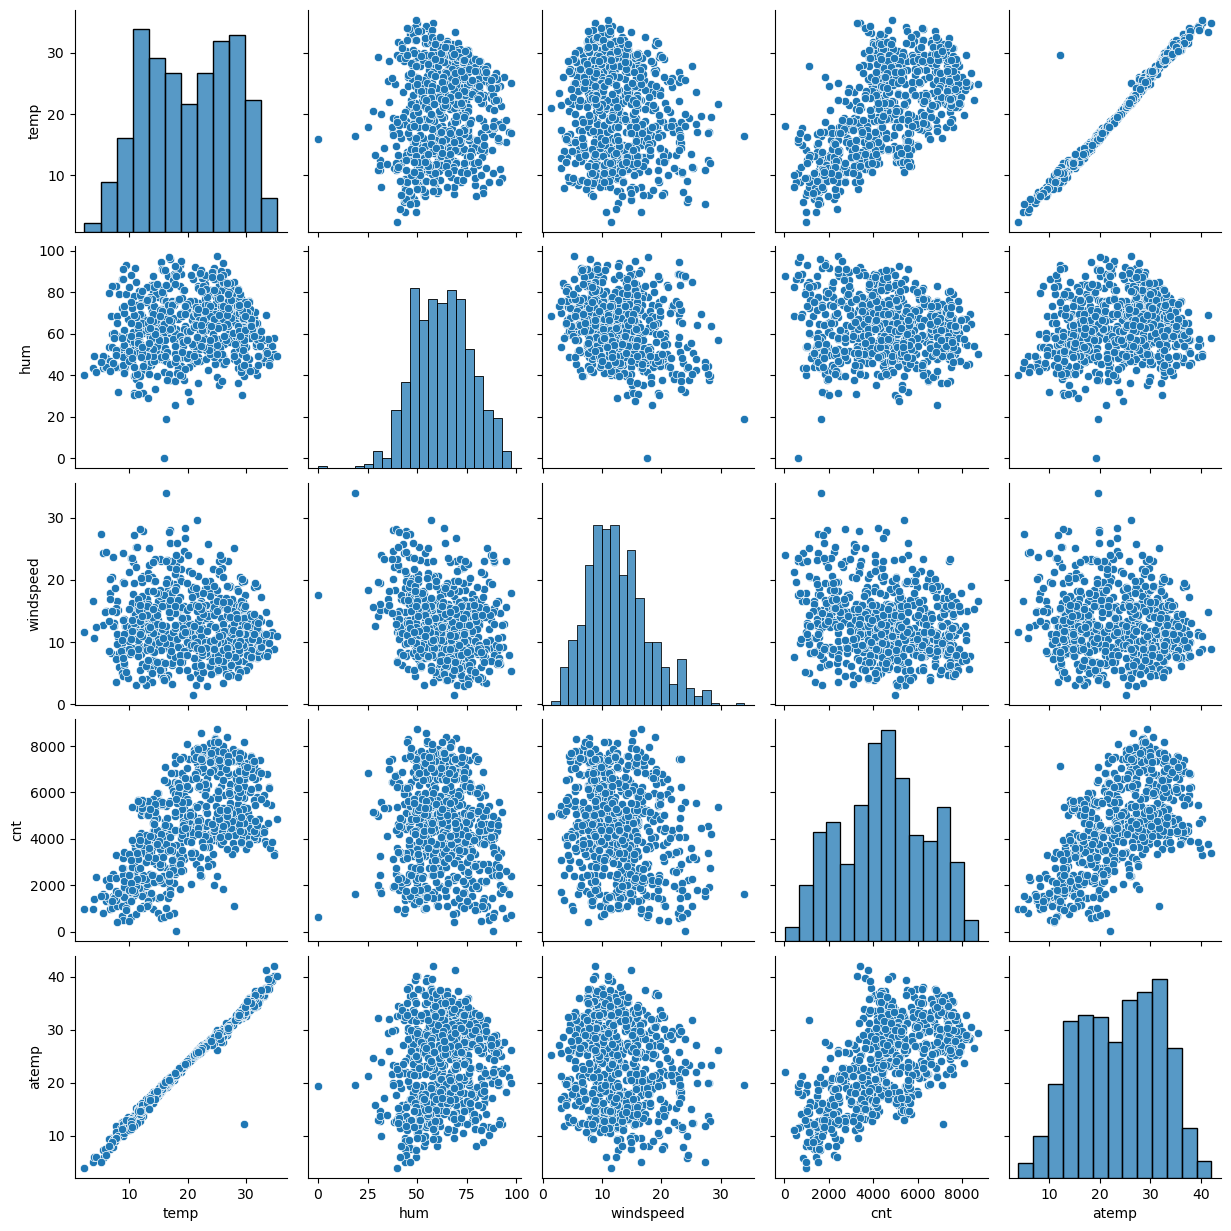

In [12]:
## Visualizing the numerical columns
sns.pairplot(data=df, vars=['temp','hum','windspeed','cnt','atemp'])
plt.show()

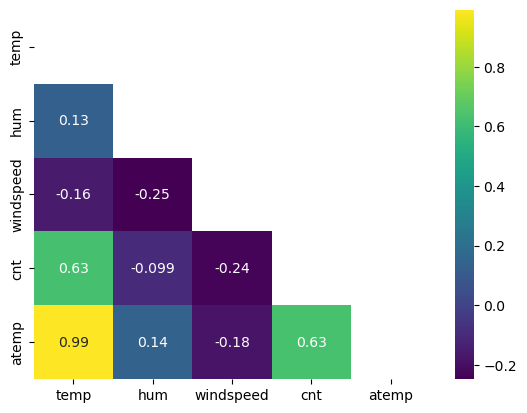

In [13]:
## Examining the correlation among numerical variables.

matrix = np.triu(df[['temp','hum','windspeed','cnt','atemp']].corr())
sns.heatmap(df[['temp','hum','windspeed','cnt','atemp']].corr(), annot=True, cmap='viridis', mask=matrix)
plt.show()

A linear relationship exists between 'temp' and 'atemp'. Due to multicollinearity, both parameters cannot be included in the model simultaneously. To determine which parameters to retain, we will assess the variance inflation factor (VIF) and p-values with respect to other variables.

## Data Preparation for Model

In [14]:
## Creating dummy variables for the month, weekday, weathersit, and season variables.
    
months_df=pd.get_dummies(df.mnth,drop_first=True, dtype= 'int')
weekdays_df=pd.get_dummies(df.weekday,drop_first=True, dtype= 'int')
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True, dtype= 'int')
seasons_df=pd.get_dummies(df.season,drop_first=True, dtype= 'int')

In [15]:
## Concatenating the dummy variables with the original dataframe.

df = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [16]:
## Removing redundant columns.

df.drop(columns=['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [17]:
## Partitioning the data into training and testing subsets.

np.random.seed(0)
df_train , df_test = train_test_split(df, train_size=0.7, random_state=100)

In [18]:
## Standardizing the numerical variables.

scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [19]:
## Examining the descriptive statistics post-scaling.

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_precipitation,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,4485.337255,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,1950.666077,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
## Generating X_train and y_train datasets.

y_train= df_train.pop('cnt')
X_train= df_train


In [21]:
## Performing Recursive Feature Elimination (RFE) to select the top 15 features.

lm= LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe= rfe.fit(X_train,y_train)

In [22]:
## Generating a summary of the RFE results including the selected features, their support status, and their ranking.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('light_precipitation', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [23]:
## Retrieving the list of features selected by Recursive Feature Elimination (RFE).

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'light_precipitation', 'misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [24]:
## Obtaining the list of features not selected by Recursive Feature Elimination (RFE).

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Model Building - Linear Regression

### Model 1

In [25]:
X_train_rfe= X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1= sm.OLS(y_train,X_train_rfe).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          8.15e-189
Time:                        18:58:43   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2800.5481    313.638      8.929      0.000    2184.318    3416.778
yr                   2002.6712     70.301     28.487      0.000    1864.546    2140.797
holiday              -791.7451    222.606     -3.557      0.000   -1229.117    -354.373
temp                 4185.2249    321.809     13.005      0.000    3552.941    4817.508
hum                 -1409.9524    328.554     -4.291      0.000   -2055.488    -764.417
windspeed           -1640.4063    224.254     -7.315      0.000   -2081.016   -1199.797
dec                  -308.2242    152.257     -2.024      0.043    -607.376      -9.073
jan                  -377.3279    157.664     -2.393      0.017    -687.103     -67.553
july                 -480.2336    158.510     -3.030      0.003    -791.671    -168.796
nov                  -336.3909    163.550     -2.057      0.040    -657.730     -15.052
sep                   655.9623    146.875      4.466      0.000     367.385     944.539
light_precipitation -2142.4134    229.612     -9.331      0.000   -2593.550   -1691.277
misty                -471.9772     90.863     -5.194      0.000    -650.503    -293.452
spring               -532.4268    184.787     -2.881      0.004    -895.493    -169.361
summer                367.9926    133.261      2.761      0.006     106.164     629.821
winter                885.8941    156.623      5.656      0.000     578.164    1193.624
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## Creating a function to calculate VIF.

def vif_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.drop(['const'], axis=1).columns
    vif["VIF"]= [ variance_inflation_factor(df.drop(['const'], axis=1).values,i) for i in range(df.drop(['const'], axis=1).shape[1])]
    vif['VIF']= round(vif['VIF'],2)
    vif= vif.sort_values(by= 'VIF', ascending=False)
    return vif

In [27]:
## VIF to check for multicollinearity in model 1.

vif_cal(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


In [28]:
## Dropping 'hum' column due to high VIF.

X_train_rfe.drop(['hum'], axis=1, inplace= True)

### Model 2

In [29]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2= sm.OLS(y_train,X_train_rfe).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          4.75e-186
Time:                        18:58:43   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2151.7943    279.592      7.696      0.000    1602.460    2701.128
yr                   2037.8822     71.038     28.687      0.000    1898.309    2177.456
holiday              -797.7182    226.484     -3.522      0.000   -1242.707    -352.729
temp                 3813.3243    315.326     12.093      0.000    3193.783    4432.866
windspeed           -1377.5254    219.487     -6.276      0.000   -1808.767    -946.283
dec                  -372.0714    154.171     -2.413      0.016    -674.982     -69.161
jan                  -434.6653    159.837     -2.719      0.007    -748.707    -120.623
july                 -434.9981    160.917     -2.703      0.007    -751.164    -118.833
nov                  -343.4459    166.394     -2.064      0.040    -670.371     -16.521
sep                   597.3994    148.790      4.015      0.000     305.061     889.738
light_precipitation -2535.8856    214.182    -11.840      0.000   -2956.704   -2115.067
misty                -695.9941     75.668     -9.198      0.000    -844.665    -547.323
spring               -619.3661    186.877     -3.314      0.001    -986.535    -252.197
summer                303.2676    134.714      2.251      0.025      38.586     567.949
winter                755.1870    156.313      4.831      0.000     448.069    1062.305
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
## VIF to check for multicollinearity in model 2.

vif_cal(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,misty,1.57


In [31]:
## Dropping 'nov' column due to high P-value.

X_train_rfe.drop(['nov'], axis=1, inplace= True)

### Model 3

In [32]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3= sm.OLS(y_train,X_train_rfe).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.74e-186
Time:                        18:58:43   Log-Likelihood:                -4123.1
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2006.1375    271.428      7.391      0.000    1472.847    2539.428
yr                   2036.3174     71.267     28.573      0.000    1896.295    2176.340
holiday              -853.4929    225.604     -3.783      0.000   -1296.751    -410.235
temp                 3981.8704    305.568     13.031      0.000    3381.502    4582.238
windspeed           -1385.1931    220.176     -6.291      0.000   -1817.786    -952.600
dec                  -245.7227    141.962     -1.731      0.084    -524.644      33.199
jan                  -392.2544    159.031     -2.467      0.014    -704.711     -79.798
july                 -433.5686    161.444     -2.686      0.007    -750.767    -116.370
sep                   644.9013    147.482      4.373      0.000     355.135     934.668
light_precipitation -2501.8066    214.246    -11.677      0.000   -2922.747   -2080.866
misty                -689.4059     75.849     -9.089      0.000    -838.431    -540.381
spring               -549.2615    184.367     -2.979      0.003    -911.498    -187.025
summer                350.8949    133.159      2.635      0.009      89.270     612.519
winter                673.0560    151.659      4.438      0.000     375.082     971.030
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## VIF to check for multicollinearity in model 3.

vif_cal(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,misty,1.57
7,sep,1.34


In [34]:
## Dropping 'dec' column due to high P-value.

X_train_rfe.drop(['dec'], axis=1, inplace= True)

### Model 4

In [35]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_4= sm.OLS(y_train,X_train_rfe).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          8.14e-187
Time:                        18:58:44   Log-Likelihood:                -4124.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1894.1837    264.138      7.171      0.000    1375.220    2413.148
yr                   2036.3860     71.410     28.517      0.000    1896.083    2176.689
holiday              -841.0190    225.941     -3.722      0.000   -1284.937    -397.101
temp                 4103.6239    297.959     13.772      0.000    3518.210    4689.038
windspeed           -1346.5329    219.480     -6.135      0.000   -1777.755    -915.310
jan                  -332.5431    155.555     -2.138      0.033    -638.170     -26.916
july                 -437.6201    161.751     -2.706      0.007    -755.420    -119.820
sep                   664.0616    147.361      4.506      0.000     374.534     953.589
light_precipitation -2480.9146    214.334    -11.575      0.000   -2902.028   -2059.801
misty                -689.0769     76.001     -9.067      0.000    -838.400    -539.754
spring               -536.2630    184.584     -2.905      0.004    -898.924    -173.602
summer                377.1062    132.560      2.845      0.005     116.659     637.554
winter                657.5914    151.699      4.335      0.000     359.540     955.643
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
## VIF to check for multicollinearity in model 4.

vif_cal(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,misty,1.56
6,sep,1.34


In [37]:
## Dropping 'jan' column due to high P-value.

X_train_rfe.drop(['jan'],axis=1, inplace= True)

### Model 5

In [38]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_5= sm.OLS(y_train,X_train_rfe).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          5.06e-187
Time:                        18:58:44   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1755.4766    256.961      6.832      0.000    1250.616    2260.337
yr                   2030.1924     71.607     28.352      0.000    1889.504    2170.881
holiday              -847.1493    226.732     -3.736      0.000   -1292.618    -401.681
temp                 4267.6654    288.938     14.770      0.000    3699.977    4835.354
windspeed           -1285.7110    218.407     -5.887      0.000   -1714.823    -856.599
july                 -452.4804    162.180     -2.790      0.005    -771.121    -133.840
sep                   667.9479    147.877      4.517      0.000     377.408     958.488
light_precipitation -2470.2587    215.043    -11.487      0.000   -2892.762   -2047.755
misty                -696.8079     76.187     -9.146      0.000    -846.495    -547.121
spring               -583.8330    183.893     -3.175      0.002    -945.135    -222.531
summer                404.0685    132.431      3.051      0.002     143.876     664.261
winter                710.4969    150.203      4.730      0.000     415.388    1005.606
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
## VIF to check for multicollinearity in model 5.

vif_cal(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,misty,1.55
5,sep,1.34
6,light_precipitation,1.08


In [40]:
## Dropping the 'July' column due to its high p-value, while retaining the 'temp' variable as it is deemed significant.

X_train_rfe.drop(['july'], axis=1, inplace= True)

### Model 6

In [41]:
X_train_rfe= sm.add_constant(X_train_rfe)
lm_6= sm.OLS(y_train,X_train_rfe).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          1.47e-186
Time:                        18:58:44   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1680.9085    257.298      6.533      0.000    1175.387    2186.430
yr                   2035.0738     72.070     28.237      0.000    1893.475    2176.672
holiday              -837.1794    228.239     -3.668      0.000   -1285.608    -388.751
temp                 4152.4862    287.911     14.423      0.000    3586.818    4718.154
windspeed           -1287.2679    219.886     -5.854      0.000   -1719.283    -855.252
sep                   790.9513    142.108      5.566      0.000     511.747    1070.156
light_precipitation -2477.4933    216.484    -11.444      0.000   -2902.826   -2052.160
misty                -684.4142     76.572     -8.938      0.000    -834.858    -533.971
spring               -481.5900    181.426     -2.654      0.008    -838.042    -125.138
summer                539.5655    124.039      4.350      0.000     295.862     783.269
winter                821.1889    145.850      5.630      0.000     534.634    1107.744
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
## VIF to check for multicollinearity in model 6.

vif_cal(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,misty,1.55
4,sep,1.23
5,light_precipitation,1.08
1,holiday,1.04


## Residual Analysis of the train data


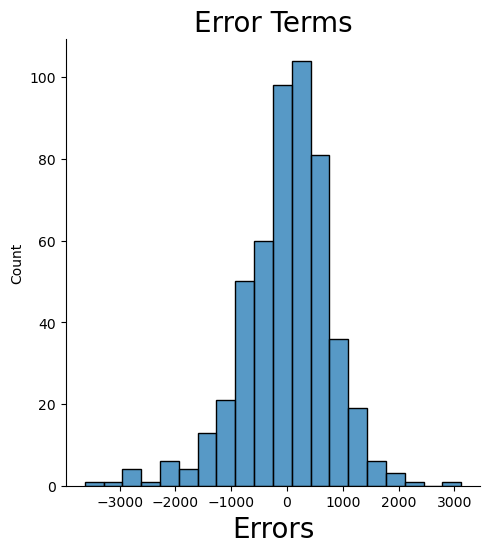

In [43]:
## Visualizing the distribution of error terms between the actual and predicted values on the training dataset.

y_train_cnt= lm_6.predict(X_train_rfe)
sns.displot(y_train - y_train_cnt ,bins= 20)
plt.title('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 20)  
plt.show()

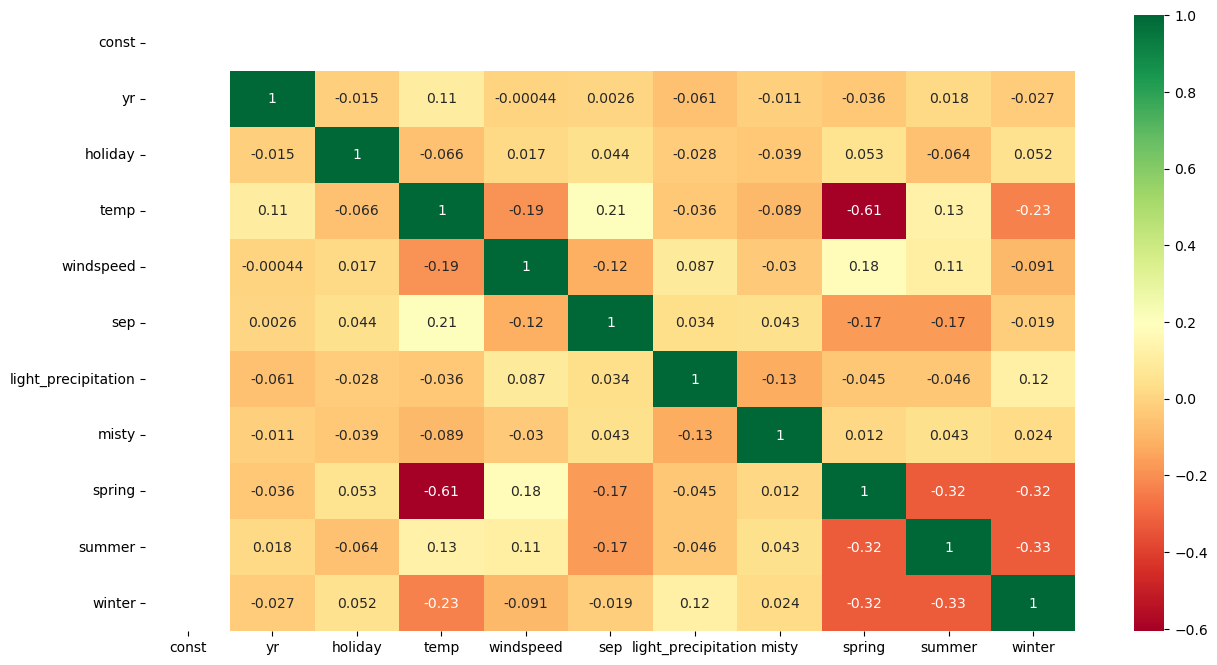

In [44]:
## Verifying the correlation between variables.

plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Generating predictions using the final model.

In [45]:
## Standardizing the test data.

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_precipitation,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,4968,0,0,...,1,0,0,0,0,0,0,0,1,0


In [46]:
## Generating X_test and y_test datasets.

y_test= df_test.pop('cnt')
X_test= df_test


In [47]:
## Analyzing descriptive statistics of the dataset.

X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,light_precipitation,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
## Making predictions on the test dataset.

X_test =sm.add_constant(X_test) # Adding a constant to the X_test.
X_test = X_test[X_train_rfe.columns] # Dropping the columns which are not present in X_train_rfe.
y_pred= lm_6.predict(X_test) 


## Model Evaluation

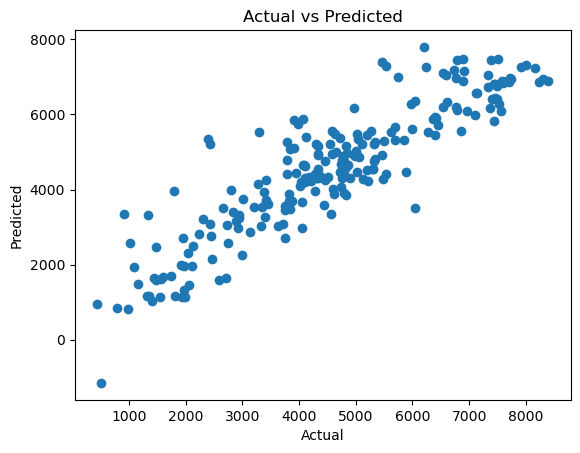

In [49]:
## Creating a scatter plot to visualize the relationship between the actual values (y_test) and the predicted values (y_pred) on the test dataset.

plt.scatter(y_test,y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

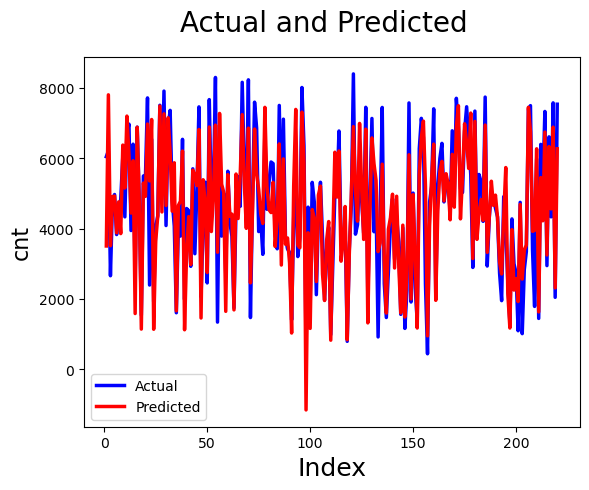

In [50]:
## Plotting y_test vs y_pred.

y_test = np.array(y_test)
y_pred = np.array(y_pred)

c = np.arange(1, len(y_test) + 1)  

fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red",  linewidth=2.5, linestyle="-", label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)  # Plot heading 
plt.xlabel('Index', fontsize=18)                   # X-label
plt.ylabel('cnt', fontsize=16)                   # Y-label
plt.legend()                                       # Add legend
plt.show()


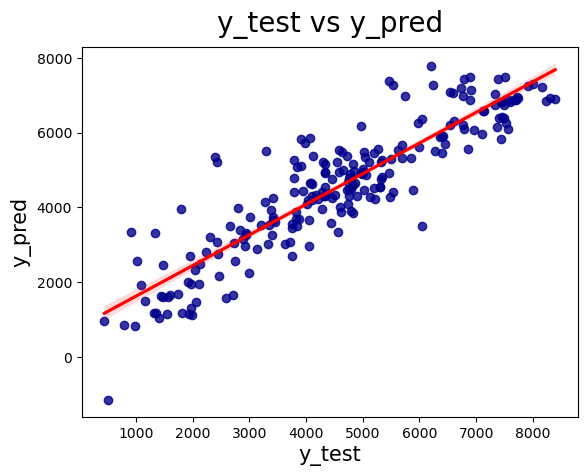

In [51]:
## Generating a regression plot to visualize the model's fit on the test data.

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=80, fit_reg=True,scatter_kws={"color": "darkblue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20,verticalalignment='bottom')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)
plt.show()

In [52]:
## Computing the R-squared score on the test data.

r2 = round(r2_score(y_test, y_pred),4)
print('R2 Square on test data :',r2)


R2 Square on test data : 0.8038


In [53]:
## Computing the adjusted R-squared score on the test data.

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print('Adjusted R2 Square on test data :',adjusted_r2)


Adjusted R2 Square on test data : 0.7934


Analyzing and contrasting the performance between the training and testing datasets.

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829
- Test dataset Adjusted R^2  : 0.7934